In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(r'C:\Users\pc\Desktop\school_deep_notes\machine learning\merged_output_cp.csv')
data.head()


,url,title,price,location,brand,year,transmission,fuel_type,kilometrage,brand.1,...,speed_limiter,alloy_wheels,esp,air_conditioning,cd/mp3/bluetooth,sieges_cuir,ordinateur_de_bord,sunroof,cruise_control,door_number
0,https://www.avito.ma/fr/abdelmoumen/voitures_d...,vente voiture electrique pour loisir,80 000 DH,"Abdelmoumen, Casablanca",Lada,2014,Automatique,Electrique,15 000 - 19 999,Lada,...,False,False,False,False,False,False,False,False,False,NaN
1,https://www.avito.ma/fr/al_maghrib_al_arabi/vo...,Rover 75 essence manuelle a kenitra,46 000 DH,"Al Maghrib Al Arabi, Kenitra",Rover,2000,Manuelle,Essence,250 000 - 299 999,Rover,...,False,False,False,False,False,False,False,False,False,5.0
2,https://www.avito.ma/fr/autre_secteur/voitures...,Rover 400 essence,27 000 DH,"Autre secteur, Rabat",Rover,2000,Manuelle,Essence,0 - 4 999,Rover,...,False,False,False,False,False,False,False,False,False,5.0
3,https://www.avito.ma/fr/agdal/voitures_d'occas...,Rover 75 Essence Manuelle 2000 à Fes,50 000 DH,"Agdal, Fes",Rover,2000,Manuelle,Essence,190 000 - 199 999,Rover,...,False,False,False,False,False,False,False,False,False,5.0
4,https://www.avito.ma/fr/khouribga/voitures_d'o...,Rover 75d,57 000 DH,"Toute la ville, Khouribga",Rover,2001,Manuelle,Diesel,200 000 - 249 999,Rover,...,False,False,False,False,False,False,False,False,False,5.0


In [ ]:
data['city'] = data['location'].str.split(',').str[-1].str.strip()
data['city']

0              Casablanca
1                 Kenitra
2                   Rabat
3                     Fes
4               Khouribga
               ...       
22634                Sale
22635              Agadir
22636              Agadir
22637           Ben Ahmed
22638    Sidi Bou Othmane
Name: city, Length: 22639, dtype: object

In [ ]:
data['price_num'] = data['price'].str.replace('DH', '').str.replace(' ', '').astype(float)
data['price_num']

0         80000.0
1         46000.0
2         27000.0
3         50000.0
4         57000.0
           ...   
22634    210000.0
22635     95000.0
22636    150000.0
22637    110000.0
22638    180000.0
Name: price_num, Length: 22639, dtype: float64

In [ ]:
brand_model_paris = data[['brand', 'model']].drop_duplicates()
print(brand_model_paris)

        brand       model
0        Lada        2107
1       Rover          75
2       Rover   Serie 400
5       Rover   Serie 600
7       Rover  Streetwise
...       ...         ...
22238  Nissan       Rogue
22511  Nissan    Kubistar
22530  Nissan       Urvan
22537  Nissan         280
22559  Nissan     Vanette

[646 rows x 2 columns]


In [ ]:
import re

# Function to check if text contains both Arabic and Latin characters
def is_mixed_arabic_latin(text):
    if isinstance(text, str):
        # Regex for detecting both Arabic and Latin characters
        return bool(re.search(r'[\u0600-\u06FF]', text) and re.search(r'[a-zA-Z]', text))
    return False



city_mapping = {
    "الدار البيضاء": "Casablanca",
    "مراكش": "Marrakech",
    "فاس": "Fes",
    "القنيطرة": "Kenitra",
    "طنجة": "Tangier",
    "تطوان": "Tetouan",
}
# # Map Arabic cities to Latin ones in the 'city' column
# data['city_latin'] = data['city'].map(city_mapping)

# # Fill NaN values in 'city_latin' with an appropriate placeholder (e.g., 'Unknown')
# data['city_latin'].fillna('Unknown', inplace=True)


# Apply to 'location' column
mixed_arabic_latin_rows = data[data['location'].apply(is_mixed_arabic_latin)]



print(mixed_arabic_latin_rows)

                                                     url  \
252    https://www.avito.ma/fr/autre_secteur/voitures...   
830    https://www.avito.ma/fr/route_de_casablanca/vo...   
1700   https://www.avito.ma/fr/route_de_sefrou/voitur...   
3138   https://www.avito.ma/fr/anfa/voitures_d'occasi...   
3386   https://www.avito.ma/fr/ain_sebaa/voitures_d'o...   
4798   https://www.avito.ma/fr/al_maghrib_al_arabi/vo...   
9954   https://www.avito.ma/fr/ahlane/voitures_d'occa...   
13124  https://www.avito.ma/fr/autre_secteur/voitures...   
13605  https://www.avito.ma/fr/autre_secteur/voitures...   
13877  https://www.avito.ma/fr/anfa/voitures_d'occasi...   
14817  https://www.avito.ma/fr/massira_2/voitures_d'o...   
15188  https://www.avito.ma/fr/gueliz/voitures_d'occa...   
16121  https://www.avito.ma/fr/autre_secteur/voitures...   
16273  https://www.avito.ma/fr/wilaya/voitures_d'occa...   
16292  https://www.avito.ma/fr/californie/voitures_d'...   
16529  https://www.avito.ma/fr/almaz/voi

In [ ]:
city_mapping = {
    "الدار البيضاء": "Casablanca",
    "مراكش": "Marrakech",
    "فاس": "Fes",
    "القنيطرة": "Kenitra",
    "طنجة": "Tangier",
    "تطوان": "Tetouan",
}
# Remplacer les noms de villes en arabe par leur équivalent en lettres latines
# dans la colonne 'city'.
# Si un nom de ville ne figure pas dans le dictionnaire 'city_mapping', il est conservé tel quel.

# La méthode .get(x, x) permet de rechercher la valeur associée à la clé x dans le dictionnaire.
# Si x n’est pas trouvé (c’est-à-dire que le nom de ville arabe n’est pas dans le dictionnaire),
# alors la valeur par défaut (le deuxième x) est retournée.
data['city'] = data['city'].apply(lambda x: city_mapping.get(x, x))


In [ ]:
import re

# Function to check if text contains both Arabic and Latin characters
def is_mixed_arabic_latin(text):
    if isinstance(text, str):
        # Regex for detecting both Arabic and Latin characters
        return bool(re.search(r'[\u0600-\u06FF]', text) and re.search(r'[a-zA-Z]', text))
    return False

# Apply to 'location' column
mixed_arabic_latin_rows = data[data['city'].apply(is_mixed_arabic_latin)]



print(mixed_arabic_latin_rows)

Empty DataFrame
Columns: [url, title, price, location, brand, year, transmission, fuel_type, kilometrage, brand.1, model, origin, first_owner, fiscal_horsepower, condition, abs, airbags, electric_windows, remote_central_locking, parking_sensors, navigation_system/gps, rear_view_camera, speed_limiter, alloy_wheels, esp, air_conditioning, cd/mp3/bluetooth, sieges_cuir, ordinateur_de_bord, sunroof, cruise_control, door_number, city]
Index: []

[0 rows x 33 columns]


In [ ]:
data[data['city'].isnull()]['city']

3061     NaN
3439     NaN
3521     NaN
6175     NaN
6398     NaN
6775     NaN
6922     NaN
8318     NaN
8775     NaN
10617    NaN
17741    NaN
19780    NaN
19890    NaN
Name: city, dtype: object

In [ ]:
print("origin column unique values : ")
print(data['origin'].unique())

print("first_owner column unique values :")
print(data['first_owner'].unique())

print("condition column unique values :")
print(data['condition'].unique())

print("door number unique values ")
print(data['door_number'].unique())

print('fiscal horsepower unique values :')
print(data['fiscal_horsepower'].unique())


print('transmission unique values')
print(data['transmission'].unique())

# posts with no price we delete the whole row

print('brand unique values :')
print(data['brand'].unique())


print('models unique values:')
# print(data['model'].unique())

print('kilometrage unique values :')
print(data['kilometrage'].unique())

print('year unique values')
print(data['year'].unique())



print('city unique values ')
print(data['city'].unique())


origin column unique values : 
['Importee neuve' 'WW au Maroc' nan 'Dedouanee' 'Pas encore dedouanee']
first_owner column unique values :
['Oui' 'Non' nan]
condition column unique values :
['Tres bon' 'Bon' 'Excellent' 'Neuf' 'Pour Pieces' 'Correct' nan
 'Endommage']
door number unique values 
[nan  5.  3.]
fiscal horsepower unique values :
['4 CV' '10 CV' '9 CV' '14 CV' '8 CV' '7 CV' '24 CV' '12 CV' '11 CV'
 '6 CV' '5 CV' '22 CV' '13 CV' '16 CV' '20 CV' 'Plus de 41 CV' '30 CV' nan
 '21 CV' '17 CV' '19 CV' '15 CV' '23 CV' '25 CV' '37 CV' '36 CV' '38 CV'
 '31 CV' '27 CV' '18 CV' '26 CV' '32 CV' '28 CV' '39 CV' '41 CV' '33 CV'
 '34 CV' '29 CV' '40 CV' '35 CV']
transmission unique values
['Automatique' 'Manuelle' nan]
brand unique values :
['Lada' 'Rover' 'Hyundai' 'Chery' 'Mazda' 'Dacia' 'Jaguar' 'Peugeot'
 'Opel' 'Mercedes-Benz' 'Renault' 'Volkswagen' 'Kia' 'Seat' 'Toyota'
 'Ssangyong' 'Citroen' 'Alfa Romeo' 'Mitsubishi' 'Porsche' 'DFSK' 'Jeep'
 'Skoda' 'Ford' 'BMW' 'Geely' 'Daewoo' 'Fi

In [ ]:
columns_to_keep = [
    'brand', 'year', 'transmission', 'fuel_type', 'kilometrage', 'model',
    'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'abs', 'airbags',
    'electric_windows', 'remote_central_locking', 'parking_sensors', 'navigation_system/gps',
    'rear_view_camera', 'speed_limiter', 'alloy_wheels', 'esp', 'air_conditioning',
    'cd/mp3/bluetooth', 'sieges_cuir', 'ordinateur_de_bord', 'sunroof', 'cruise_control',
    'door_number', 'city', 'price_num'
]

In [ ]:
data_v1 = data[columns_to_keep].copy()
data_v1.rename(columns={'price_num': 'price'}, inplace=True)

In [ ]:
data_v1.rename(columns={'ordinateur_de_bord': 'on_board_computer', 'sieges_cuir': 'leather_seats' }, inplace=True)

In [ ]:
print(data_v1.columns)

Index(['brand', 'year', 'transmission', 'fuel_type', 'kilometrage', 'model',
       'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'abs',
       'airbags', 'electric_windows', 'remote_central_locking',
       'parking_sensors', 'navigation_system/gps', 'rear_view_camera',
       'speed_limiter', 'alloy_wheels', 'esp', 'air_conditioning',
       'cd/mp3/bluetooth', 'leather_seats', 'on_board_computer', 'sunroof',
       'cruise_control', 'door_number', 'city', 'price'],
      dtype='object')


In [ ]:
duplicates = data_v1[data_v1.duplicated()]
print(duplicates)
print(data_v1.duplicated().sum())

         brand  year transmission fuel_type        kilometrage     model  \
112    Hyundai  2017     Manuelle   Essence    80 000 - 84 999       i10   
235    Hyundai  2022  Automatique    Diesel    85 000 - 89 999    Tucson   
282    Hyundai  2021  Automatique   Essence    85 000 - 89 999       i10   
374    Hyundai  2006     Manuelle    Diesel  300 000 - 349 999  Terracan   
485    Hyundai  2024  Automatique   Essence      5 000 - 9 999    Accent   
...        ...   ...          ...       ...                ...       ...   
22508   Nissan  2008     Manuelle    Diesel  200 000 - 249 999   Qashqai   
22547   Nissan  2017     Manuelle    Diesel  100 000 - 109 999   Qashqai   
22590   Nissan  2017     Manuelle    Diesel  100 000 - 109 999   Qashqai   
22626   Nissan  2017     Manuelle    Diesel  170 000 - 179 999      Juke   
22630   Nissan  2010     Manuelle    Diesel  200 000 - 249 999   Qashqai   

            origin first_owner fiscal_horsepower  condition  ...    esp  \
112    WW au

In [ ]:
len(data_v1)

22639

In [ ]:
# dropping the duplicates:
data_v1 = data_v1.drop_duplicates(keep='first')

In [ ]:
print(len(data_v1))


21696


In [ ]:
# Missing Values Visuals :

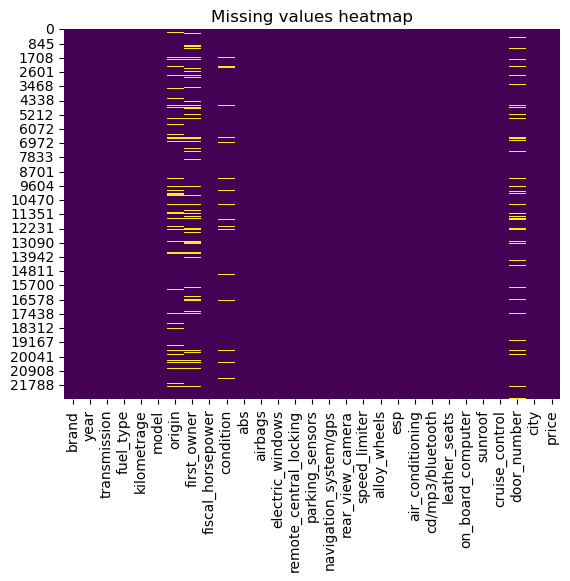

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data_v1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()


In [ ]:
# Missing values :
print("Missing values")
print(data_v1.isnull().sum())

Missing values
brand                        0
year                         0
transmission                31
fuel_type                    0
kilometrage                  0
model                        0
origin                    2528
first_owner               2728
fiscal_horsepower           38
condition                  763
abs                          0
airbags                      0
electric_windows             0
remote_central_locking       0
parking_sensors              0
navigation_system/gps        0
rear_view_camera             0
speed_limiter                0
alloy_wheels                 0
esp                          0
air_conditioning             0
cd/mp3/bluetooth             0
leather_seats                0
on_board_computer            0
sunroof                      0
cruise_control               0
door_number               2246
city                         0
price                        0
dtype: int64


In [ ]:
data_v1.dropna(subset=['price', 'year', 'city'], how='all', inplace=True)

In [ ]:
data_v1[data_v1['city'].isnull()]

,brand,year,transmission,fuel_type,kilometrage,model,origin,first_owner,fiscal_horsepower,condition,...,esp,air_conditioning,cd/mp3/bluetooth,leather_seats,on_board_computer,sunroof,cruise_control,door_number,city,price


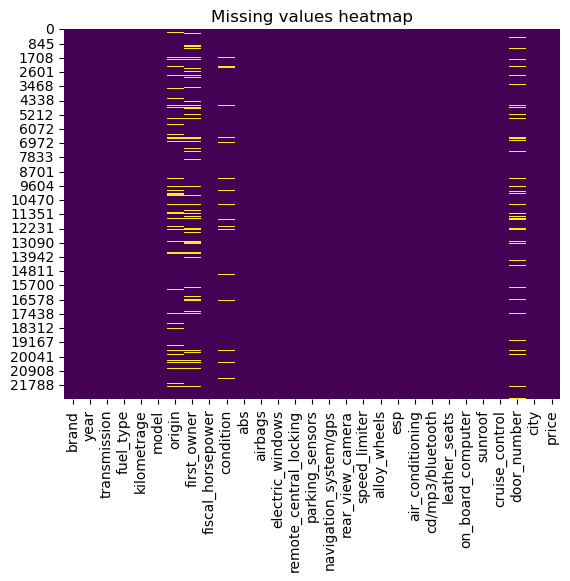

In [ ]:
import seaborn as sns
# y-axis is the row indices/numbers in the dataframe
# y axis shows which rows have missing data

sns.heatmap(data_v1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

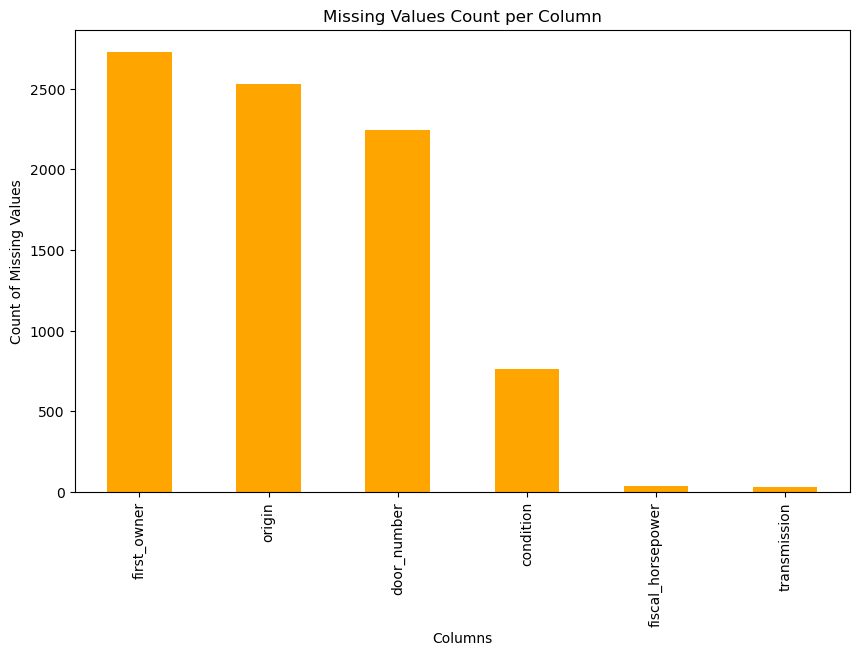

In [ ]:
import matplotlib.pyplot as plt

# Count missing values for each column
missing_data = data_v1.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10,6))
missing_data[missing_data > 0].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Missing Values Count per Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Missing values :
print("Missing values")

k = data_v1.isnull().sum()
print("Index (All columns) :\n" , k.index)
print()
cols_with_missing_values = k[k>0]
print("Index (Only columns with missing values) : \n",
      [*cols_with_missing_values.index])

print(k[k > 0])

Missing values
Index (All columns) :
 Index(['brand', 'year', 'transmission', 'fuel_type', 'kilometrage', 'model',
       'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'abs',
       'airbags', 'electric_windows', 'remote_central_locking',
       'parking_sensors', 'navigation_system/gps', 'rear_view_camera',
       'speed_limiter', 'alloy_wheels', 'esp', 'air_conditioning',
       'cd/mp3/bluetooth', 'leather_seats', 'on_board_computer', 'sunroof',
       'cruise_control', 'door_number', 'city', 'price'],
      dtype='object')

Index (Only columns with missing values) : 
 ['transmission', 'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'door_number']


transmission           31
origin               2528
first_owner          2728
fiscal_horsepower      38
condition             763
door_number          2246
dtype: int64


In [ ]:

for col in [*cols_with_missing_values.index]:
    print(f"Unique values in '{col}':")
    print(data_v1[col].unique())
    print("-" * 40)

Unique values in 'transmission':
['Automatique' 'Manuelle' nan]
----------------------------------------
Unique values in 'origin':
['Importee neuve' 'WW au Maroc' nan 'Dedouanee' 'Pas encore dedouanee']
----------------------------------------
Unique values in 'first_owner':
['Oui' 'Non' nan]
----------------------------------------
Unique values in 'fiscal_horsepower':
['4 CV' '10 CV' '9 CV' '14 CV' '8 CV' '7 CV' '24 CV' '12 CV' '11 CV'
 '6 CV' '5 CV' '22 CV' '13 CV' '16 CV' '20 CV' 'Plus de 41 CV' '30 CV' nan
 '21 CV' '17 CV' '19 CV' '15 CV' '23 CV' '25 CV' '37 CV' '36 CV' '38 CV'
 '31 CV' '27 CV' '18 CV' '26 CV' '32 CV' '28 CV' '39 CV' '41 CV' '33 CV'
 '34 CV' '29 CV' '40 CV' '35 CV']
----------------------------------------
Unique values in 'condition':
['Tres bon' 'Bon' 'Excellent' 'Neuf' 'Pour Pieces' 'Correct' nan
 'Endommage']
----------------------------------------
Unique values in 'door_number':
[nan  5.  3.]
----------------------------------------


In [ ]:
for col in [*cols_with_missing_values.index]:
    print(f"Uniques values count in {col}")
    print()
    print(data_v1[col].value_counts(dropna=False))
    print("-" * 40)

Uniques values count in transmission

Manuelle       13531
Automatique     8134
NaN               31
Name: transmission, dtype: int64
----------------------------------------
Uniques values count in origin

WW au Maroc             15276
Dedouanee                2842
NaN                      2528
Importee neuve            916
Pas encore dedouanee      134
Name: origin, dtype: int64
----------------------------------------
Uniques values count in first_owner

Non    11598
Oui     7370
NaN     2728
Name: first_owner, dtype: int64
----------------------------------------
Uniques values count in fiscal_horsepower

6 CV             7633
8 CV             6325
7 CV             2070
9 CV             1607
5 CV              899
10 CV             866
12 CV             829
11 CV             697
4 CV              233
13 CV              85
17 CV              79
14 CV              63
Plus de 41 CV      54
20 CV              42
NaN                38
15 CV              25
16 CV              24
21 CV    

In [ ]:
# REplacing null values :

#  transmission (Categorical)  Manuelle(14210) Automatique(8385)
#  replace with most frequent (mode)  NaN=31
data_v1['transmission'].fillna(data_v1['transmission'].mode()[0], inplace=True)

# origin 4 values - Categorical
# WW au Maroc             15965
# Dedouanee                2958
# NaN                      2621
# Importee neuve            945
# Pas encore dedouanee      137
# replace with fill with most frequent ? mode
data_v1['origin'].fillna(data_v1['origin'].mode()[0], inplace=True)


# first_ower
# binary yes/no
# fill with most frequent = mode = non
data_v1['first_owner'].fillna(data_v1['first_owner'].mode()[0], inplace=True)

# fiscal_horspower
# many options = categorical
# replace with most frequent 6CV
data_v1['fiscal_horsepower'].fillna(data_v1['fiscal_horsepower'].mode()[0], inplace=True)


# condition
# categorical
# fill with most frequent = mode = Excellent
data_v1['condition'].fillna(data_v1['condition'].mode()[0], inplace=True)


# door_number :
#categorical
# most frequent = mode = 5
data_v1['door_number'].fillna(data_v1['door_number'].mode()[0], inplace=True)


In [ ]:
# For screens ::

In [ ]:
# Origine : variable catégorielle avec 4 modalités connues + valeurs manquantes
# Modalités principales : # For screens :: "WW au Maroc" | "Dédouanée" | "Importée neuve" | "Pas encore dédouanée"
# Valeurs manquantes : 2 621
# Stratégie : remplacement par la modalité la plus fréquente => "WW au Maroc"
data_v1['origin'].fillna(data_v1['origin'].mode()[0], inplace=True)

In [ ]:
# Puissance fiscale : à l’origine catégorielle (ex : "6CV", "7CV"....)
# Valeurs manquantes : remplacées par la modalité la plus fréquente => "6CV"
# Remarque : bien que convertie ensuite en numérique, le traitement est cohérent car
# il s’agit de valeurs discrètes.
data_v1['fiscal_horsepower'].fillna(data_v1['fiscal_horsepower'].mode()[0], inplace=True)


In [ ]:
# État du véhicule (condition) : variable catégorielle
# Modalités typiques : "Excellent", "Bon",...
# Valeurs manquantes : remplacées par la modalité la plus fréquente => "Excellent"
data_v1['condition'].fillna(data_v1['condition'].mode()[0], inplace=True)


In [ ]:
# Nombre de portes : discrète mais traitée comme catégorielle (ex : 3, 4, 5)
# Valeurs manquantes : remplacées par la modalité la plus fréquente => 5
data_v1['door_number'].fillna(data_v1['door_number'].mode()[0], inplace=True)

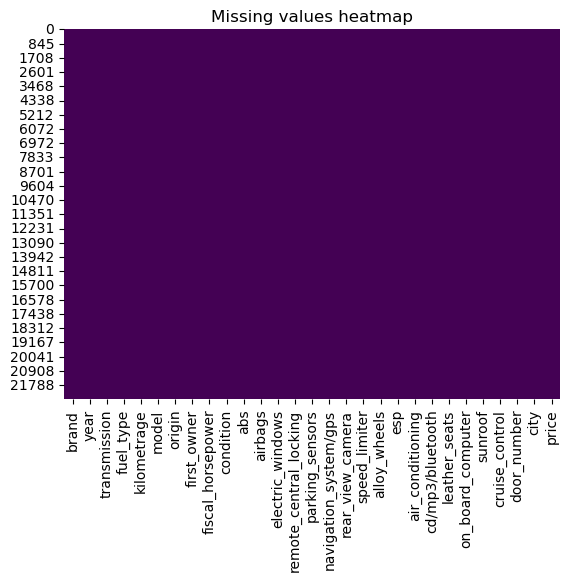

In [ ]:
# after imputation :
import seaborn as sns
# y-axis is the row indices/numbers in the dataframe
# y axis shows which rows have missing data

sns.heatmap(data_v1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing values heatmap")
plt.show()

In [ ]:
data_v1.isnull().sum()

brand                     0
year                      0
transmission              0
fuel_type                 0
kilometrage               0
model                     0
origin                    0
first_owner               0
fiscal_horsepower         0
condition                 0
abs                       0
airbags                   0
electric_windows          0
remote_central_locking    0
parking_sensors           0
navigation_system/gps     0
rear_view_camera          0
speed_limiter             0
alloy_wheels              0
esp                       0
air_conditioning          0
cd/mp3/bluetooth          0
leather_seats             0
on_board_computer         0
sunroof                   0
cruise_control            0
door_number               0
city                      0
price                     0
dtype: int64

In [ ]:
# transforming the categorical kilometrage to number
# transforming the categroical horsepower to number
# data_v1['kilometrage_num'] = data_v1['kilometrage_num'] = data_v1['kilometrage'].str.replace(' ', '').str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)

# data looks like this 0-4999 , ranges,, explain with examples
data_v1['kilometrage_num'] = data_v1['kilometrage'].str.replace(' ', '').apply(lambda x: int(x.replace('Plusde', '')) if 'Plusde' in x else (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# categoy means no order
data_v1['kilometrage_num']



0         17499.5
1        274999.5
2          2499.5
3        194999.5
4        224999.5
           ...   
22634    274999.5
22635    274999.5
22636    144999.5
22637    174999.5
22638    154999.5
Name: kilometrage_num, Length: 21696, dtype: float64

In [ ]:
data_v1['fiscal_horsepower_num'] = data_v1['fiscal_horsepower'].str.extract(r'(\d+)').astype(float)
data_v1['fiscal_horsepower_num']

0         4.0
1        10.0
2         9.0
3        14.0
4         8.0
         ... 
22634     6.0
22635     8.0
22636    10.0
22637     6.0
22638     6.0
Name: fiscal_horsepower_num, Length: 21696, dtype: float64

In [ ]:
data_v1.dtypes

brand                      object
year                       object
transmission               object
fuel_type                  object
kilometrage                object
model                      object
origin                     object
first_owner                object
fiscal_horsepower          object
condition                  object
abs                          bool
airbags                      bool
electric_windows             bool
remote_central_locking       bool
parking_sensors              bool
navigation_system/gps        bool
rear_view_camera             bool
speed_limiter                bool
alloy_wheels                 bool
esp                          bool
air_conditioning             bool
cd/mp3/bluetooth             bool
leather_seats                bool
on_board_computer            bool
sunroof                      bool
cruise_control               bool
door_number               float64
city                       object
price                     float64
kilometrage_nu

In [ ]:
data_v1['year'] = data_v1['year'].str.extract(r'(\d{4})').astype(float).astype('Int64')

In [ ]:
print(data_v1['year'].unique())


[2014 2000 2001 1998 1994 2020 2018 2007 2013 2012 1999 1997 2006 1996
 2008 2023 2022 2016 2021 2017 2015 2019 2011 2010 2005 2009 2024 2025
 2004 2003 2002 1993 1995 1987 1986 1989 1991 1988 1992 1990 1985 1980
 1983 1984 1982 1981]


In [ ]:
# Finally to integer (nullable Int64)
data_v1['year'] = data_v1['year'].astype('Int64')

In [ ]:
data_v1.dtypes

brand                      object
year                        Int64
transmission               object
fuel_type                  object
kilometrage                object
model                      object
origin                     object
first_owner                object
fiscal_horsepower          object
condition                  object
abs                          bool
airbags                      bool
electric_windows             bool
remote_central_locking       bool
parking_sensors              bool
navigation_system/gps        bool
rear_view_camera             bool
speed_limiter                bool
alloy_wheels                 bool
esp                          bool
air_conditioning             bool
cd/mp3/bluetooth             bool
leather_seats                bool
on_board_computer            bool
sunroof                      bool
cruise_control               bool
door_number               float64
city                       object
price                     float64
kilometrage_nu

In [ ]:
# all uniques values of all columns :
for col in data_v1.columns:
    if col != 'price'and col != 'city' and col != 'kilometrage' and col != 'model':
        print("-" * 40)
        print(f"Unique values of column {col}")
        print(data_v1[col].unique())



----------------------------------------
Unique values of column brand
['Lada' 'Rover' 'Hyundai' 'Chery' 'Mazda' 'Dacia' 'Jaguar' 'Peugeot'
 'Opel' 'Mercedes-Benz' 'Renault' 'Volkswagen' 'Kia' 'Seat' 'Toyota'
 'Ssangyong' 'Citroen' 'Alfa Romeo' 'Mitsubishi' 'Porsche' 'DFSK' 'Jeep'
 'Skoda' 'Ford' 'BMW' 'Geely' 'Daewoo' 'Fiat' 'Honda' 'Volvo' 'Suzuki'
 'Chevrolet' 'Cadillac' 'Audi' 'Nissan']
----------------------------------------
Unique values of column year
['2014' '2000' '2001' '1998' '1994' '2020' '2018' '2007' '2013' '2012'
 '1999' '1997' '2006' '1996' '2008' '2023' '2022' '2016' '2021' '2017'
 '2015' '2019' '2011' '2010' '2005' '2009' '2024' '2025' '2004' '2003'
 '2002' '1993' '1995' '1987' '1986' '1989' '1991' '1988' '1992' '1990'
 '1985' '1980 ou plus ancien' '1983' '1984' '1982' '1981']
----------------------------------------
Unique values of column transmission
['Automatique' 'Manuelle']
----------------------------------------
Unique values of column fuel_type
['Electrique'

In [ ]:
data_v1.drop(data_v1[data_v1['brand'] == 'Lada'].index, inplace=True)

In [ ]:
data_v1.columns


Index(['brand', 'year', 'transmission', 'fuel_type', 'kilometrage', 'model',
       'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'abs',
       'airbags', 'electric_windows', 'remote_central_locking',
       'parking_sensors', 'navigation_system/gps', 'rear_view_camera',
       'speed_limiter', 'alloy_wheels', 'esp', 'air_conditioning',
       'cd/mp3/bluetooth', 'leather_seats', 'on_board_computer', 'sunroof',
       'cruise_control', 'door_number', 'city', 'price', 'kilometrage_num',
       'fiscal_horsepower_num'],
      dtype='object')

In [ ]:
data_v1.dtypes

brand                      object
year                        Int64
transmission               object
fuel_type                  object
kilometrage                object
model                      object
origin                     object
first_owner                object
fiscal_horsepower          object
condition                  object
abs                          bool
airbags                      bool
electric_windows             bool
remote_central_locking       bool
parking_sensors              bool
navigation_system/gps        bool
rear_view_camera             bool
speed_limiter                bool
alloy_wheels                 bool
esp                          bool
air_conditioning             bool
cd/mp3/bluetooth             bool
leather_seats                bool
on_board_computer            bool
sunroof                      bool
cruise_control               bool
door_number               float64
city                       object
price                     float64
kilometrage_nu

In [ ]:
manual_electric_cars = data_v1[(data_v1['fuel_type'] == 'Electrique') & (data_v1['transmission'] == 'Manuelle')]
print(manual_electric_cars)

            brand  year transmission   fuel_type        kilometrage  \
1375        Dacia  2025     Manuelle  Electrique  300 000 - 349 999   
3937         Opel  2017     Manuelle  Electrique  170 000 - 179 999   
4014         Opel  2017     Manuelle  Electrique  170 000 - 179 999   
7624   Volkswagen  2017     Manuelle  Electrique    20 000 - 24 999   
11748     Citroen  2006     Manuelle  Electrique  300 000 - 349 999   
13143     Porsche  2020     Manuelle  Electrique    95 000 - 99 999   
15084        Ford  2019     Manuelle  Electrique  120 000 - 129 999   

           model       origin first_owner fiscal_horsepower  condition  ...  \
1375       Logan  WW au Maroc         Non              8 CV  Excellent  ...   
3937       Astra  WW au Maroc         Non              6 CV   Tres bon  ...   
4014       Astra  WW au Maroc         Non              6 CV   Tres bon  ...   
7624   Caravelle  WW au Maroc         Non              8 CV  Excellent  ...   
11748         C4  WW au Maroc       

In [ ]:
len(data_v1)

21695

In [ ]:


# Define the condition to identify the rows to drop
condition_to_drop = (data_v1['fuel_type'] == 'Electrique') & (data_v1['transmission'] == 'Manuelle')

# Drop the rows that satisfy the condition
# The `.index` gets the row labels (indices) of the filtered DataFrame
# The `drop()` method removes rows based on these indices
# We reassign the result back to data_v1 to update the DataFrame
data_v1 = data_v1.drop(data_v1[condition_to_drop].index)

# You can verify that these rows are gone:
# print("Checking if manual electric rows still exist:")
# print(data_v1[condition_to_drop])
# print("\nNew DataFrame shape (rows, columns):")
# print(data_v1.shape)

In [ ]:
len(data_v1)

21688

In [ ]:
print("Checking if manual electric rows still exist:")
print(data_v1[condition_to_drop])
print("\nNew DataFrame shape (rows, columns):")
print(data_v1.shape)

Checking if manual electric rows still exist:
Empty DataFrame
Columns: [brand, year, transmission, fuel_type, kilometrage, model, origin, first_owner, fiscal_horsepower, condition, abs, airbags, electric_windows, remote_central_locking, parking_sensors, navigation_system/gps, rear_view_camera, speed_limiter, alloy_wheels, esp, air_conditioning, cd/mp3/bluetooth, leather_seats, on_board_computer, sunroof, cruise_control, door_number, city, price, kilometrage_num, fiscal_horsepower_num]
Index: []

[0 rows x 31 columns]

New DataFrame shape (rows, columns):
(21688, 31)


C:\Users\pc\AppData\Local\Temp\ipykernel_18904\2746864891.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(data_v1[condition_to_drop])


In [ ]:
print(data_v1.columns)
print(data_v1.dtypes)

Index(['brand', 'year', 'transmission', 'fuel_type', 'kilometrage', 'model',
       'origin', 'first_owner', 'fiscal_horsepower', 'condition', 'abs',
       'airbags', 'electric_windows', 'remote_central_locking',
       'parking_sensors', 'navigation_system/gps', 'rear_view_camera',
       'speed_limiter', 'alloy_wheels', 'esp', 'air_conditioning',
       'cd/mp3/bluetooth', 'leather_seats', 'on_board_computer', 'sunroof',
       'cruise_control', 'door_number', 'city', 'price', 'kilometrage_num',
       'fiscal_horsepower_num'],
      dtype='object')
brand                      object
year                        Int64
transmission               object
fuel_type                  object
kilometrage                object
model                      object
origin                     object
first_owner                object
fiscal_horsepower          object
condition                  object
abs                          bool
airbags                      bool
electric_windows             bool